# [2] Data Handling and Preparation

In [1]:
# 기본 라이브러리 로딩 및 사용자 정의함수 정의

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.polynomial.polynomial import polyfit
import matplotlib.style as style 

import warnings
warnings.filterwarnings('ignore')


# define universally useful UDFs

# define random jitter
def rjitt(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev


# custom min max scaler
def mnmx_scl(vec):
    vec = (vec-vec.min())/(vec.max()-vec.min())
    return(vec)

def zrmx_scl(vec):
    vec = vec/vec.max()
    return(vec)

# to set data path
dataPath = 'https://raw.githubusercontent.com/stillxyxon/py_ml_analysis/master/'


# matplotlib 에서 한글을 표시하기 위한 설정
import matplotlib

font_name = matplotlib.font_manager.FontProperties(
                fname="c:/Windows/Fonts/malgun.ttf"  # 윈도우즈의 한글 폰트 위치를 지정
            ).get_name()
matplotlib.rc('font', family=font_name) # 한글 표시 가능하도록 폰트 지정 
matplotlib.rcParams['axes.unicode_minus'] = False #  음수를 나타내는 '-' 부호가 정상 표시되도록

### The dataset: A Virtual Customer Transaction Summary 

about Customer Transaction Summary dataset
- 가상적인 신용카드사 또는 종합쇼핑몰 의 거래내역을 기초 집계해서 생성한 데이터 (가정)
- 카테고리들을 자신의 업종에 대입한다면 (상품군 - 예: 보험이라면 장기, 단기, 종합 등)

In [2]:
# mostly young, female customers

print(dataPath)
dfc20 = pd.read_csv(dataPath + 'dfc20bs.csv')
print(dfc20.columns)
list_feat = ['custid','age','amt_nike', 'amt_hnm','amt_strbk','amt_dgt','amt_book','amt_htl', 'amt_prmmsneakers', 
             'cnt_pstyr', 'cnt_login',
             'amt_nxtyr', 'cnt_nxtyr']

dfc21 = dfc20[list_feat]
print(dfc21.shape)
dfc21.head()

https://raw.githubusercontent.com/stillxyxon/py_ml_analysis/master/
Index(['Unnamed: 0', 'custid', 'age', 'sex', 'marital', 'area', 'education',
       'amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt', 'amt_book', 'amt_htl',
       'amt_prmmsneakers', 'amt_food', 'amt_beauty', 'cnt_pstyr', 'amt_pstyr',
       'cnt_login', 'amt_nxtyr', 'cnt_nxtyr'],
      dtype='object')
(6000, 13)


,custid,age,amt_nike,amt_hnm,amt_strbk,amt_dgt,amt_book,amt_htl,amt_prmmsneakers,cnt_pstyr,cnt_login,amt_nxtyr,cnt_nxtyr
0,1,27,25100,0,20000,0,0,0,0,4,15,185921,3
1,2,28,21500,0,21700,0,0,0,0,3,17,271796,8
2,3,27,0,0,20200,0,0,0,0,2,16,369348,3
3,4,27,0,0,0,0,0,0,0,2,10,387005,8
4,5,27,20100,0,34000,0,0,0,76700,4,22,204884,10


(6000, 21)


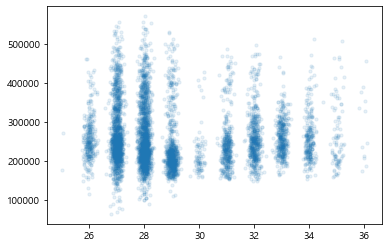

In [3]:
print(dfc20.shape)
plt.scatter(rjitt(dfc20.age), dfc20.amt_pstyr, alpha=0.1, s=10)

In [4]:
print('Column Descriptions\n=======================')
print(dfc21.columns)
print(['고객번호', '연령', '나이키구매액', '스타벅스구매액', '디지털구매액', '서적구매액', '호텔구매액','프리미엄스니커즈구매액','구매건수','로그인건수','다음해구매금액','다음해구매건수'])

Column Descriptions
Index(['custid', 'age', 'amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt',
       'amt_book', 'amt_htl', 'amt_prmmsneakers', 'cnt_pstyr', 'cnt_login',
       'amt_nxtyr', 'cnt_nxtyr'],
      dtype='object')
['고객번호', '연령', '나이키구매액', '스타벅스구매액', '디지털구매액', '서적구매액', '호텔구매액', '프리미엄스니커즈구매액', '구매건수', '로그인건수', '다음해구매금액', '다음해구매건수']


### Understanding Data Structure

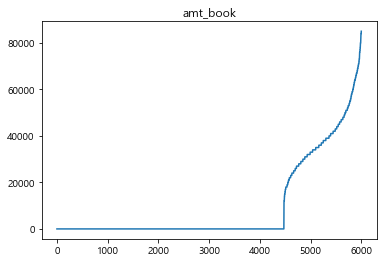

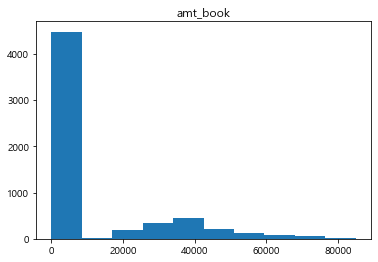

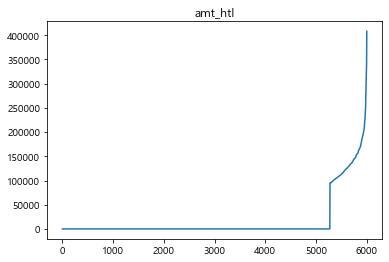

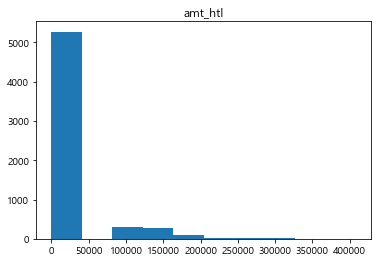

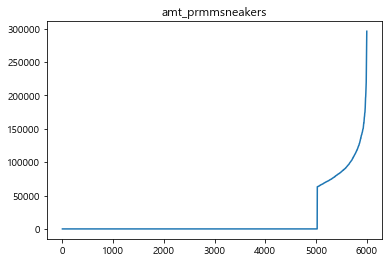

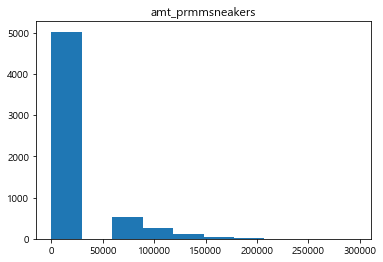

In [5]:
# Check Distributions

feats = ['amt_book', 'amt_htl', 'amt_prmmsneakers']
for x in feats:
    plt.plot(dfc21.index, dfc21[x].sort_values())
    plt.title(x)
    plt.show()
    
    plt.hist(dfc21[x])
    plt.title(x)
    plt.show()

# not all customer buys in every category

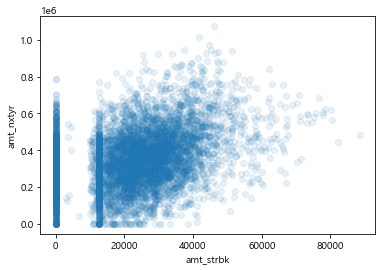

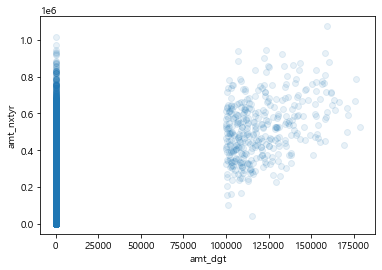

In [6]:
# relationships between variables

plt.scatter(dfc21.amt_strbk, dfc21.amt_nxtyr, alpha=0.1)
plt.xlabel('amt_strbk')
plt.ylabel('amt_nxtyr')
plt.show()

plt.scatter(dfc21.amt_dgt, dfc21.amt_nxtyr, alpha=0.1)
plt.xlabel('amt_dgt')
plt.ylabel('amt_nxtyr')
plt.show()

age  :  -0.0392
amt_nike  :  0.1255
amt_hnm  :  0.0424
amt_strbk  :  0.3592
amt_dgt  :  0.2785
amt_book  :  0.3037
amt_htl  :  -0.0143
amt_prmmsneakers  :  0.0174
cnt_pstyr  :  0.1503
cnt_login  :  -0.0668


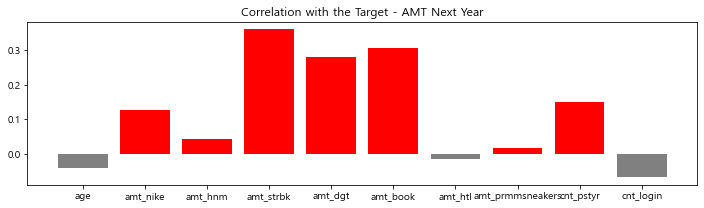

age  :  -0.0041
amt_nike  :  0.0502
amt_hnm  :  0.0547
amt_strbk  :  0.1146
amt_dgt  :  0.017
amt_book  :  -0.0209
amt_htl  :  0.022
amt_prmmsneakers  :  0.0254
cnt_pstyr  :  0.08
cnt_login  :  -0.0479


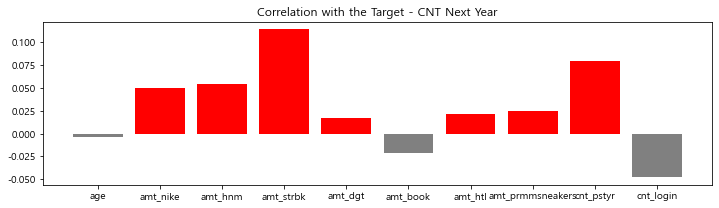

In [7]:
featlist = ['age', 'amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt',
            'amt_book', 'amt_htl', 'amt_prmmsneakers', 'cnt_pstyr', 'cnt_login']


# 결과를 저장할 배열을 미리 생성
corrvals = np.repeat(0.00, len(featlist))
# 지표 리스트 생성
indicators = ['hr','obp','slg', 'ops']

# list and index 동시에 필요
for i in range(len(featlist)):
    corrvals[i] = round(np.corrcoef(dfc21.amt_nxtyr, dfc21[featlist[i]])[0,1],4)
    print(featlist[i], ' : ', corrvals[i])


# plotting correlations
colors1 = ['red' if x>0 else 'grey' for x in corrvals]
plt.figure(figsize=(12,3))    
plt.bar(featlist,corrvals, color=colors1)
plt.title('Correlation with the Target - AMT Next Year')
plt.show()


# list and index 동시에 필요
for i in range(len(featlist)):
    corrvals[i] = round(np.corrcoef(dfc21.cnt_nxtyr, dfc21[featlist[i]])[0,1],4)
    print(featlist[i], ' : ', corrvals[i])


# plotting correlations
colors1 = ['red' if x>0 else 'grey' for x in corrvals]
plt.figure(figsize=(12,3))    
plt.bar(featlist,corrvals, color=colors1)
plt.title('Correlation with the Target - CNT Next Year')
plt.show()

### 파생변수 생성 get derived features

In [8]:
# category 중에서 몇개나 구매했는가

featlist = ['amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt',
            'amt_book', 'amt_htl', 'amt_prmmsneakers']

# print(dfc21.columns)
featlist1 = ['custid'] + featlist

# wide format을 long format으로 변환
dfc21_01 = pd.melt(dfc21[featlist1], id_vars='custid', value_vars=featlist)
# 값이 0 보다 큰 레코드만 고른 후 중복을 제거
dfc21_01 = dfc21_01[dfc21_01.value>0][['custid', 'variable']].drop_duplicates()
# 카테고리 수를 산출
dfc21_02 = dfc21_01.groupby('custid').count().reset_index()
dfc21_02.columns = ['custid', 'cnt_cat']
# dfc21_02.head()
dfc21 = dfc21.merge(dfc21_02, on='custid', how='left')
dfc21.head()

,custid,age,amt_nike,amt_hnm,amt_strbk,amt_dgt,amt_book,amt_htl,amt_prmmsneakers,cnt_pstyr,cnt_login,amt_nxtyr,cnt_nxtyr,cnt_cat
0,1,27,25100,0,20000,0,0,0,0,4,15,185921,3,2.0
1,2,28,21500,0,21700,0,0,0,0,3,17,271796,8,2.0
2,3,27,0,0,20200,0,0,0,0,2,16,369348,3,1.0
3,4,27,0,0,0,0,0,0,0,2,10,387005,8,NaN
4,5,27,20100,0,34000,0,0,0,76700,4,22,204884,10,3.0


,custid,age,amt_nike,amt_hnm,amt_strbk,amt_dgt,amt_book,amt_htl,amt_prmmsneakers,cnt_pstyr,cnt_login,amt_nxtyr,cnt_nxtyr,cnt_cat
0,1,27,25100,0,20000,0,0,0,0,4,15,185921,3,2.0
1,2,28,21500,0,21700,0,0,0,0,3,17,271796,8,2.0
2,3,27,0,0,20200,0,0,0,0,2,16,369348,3,1.0
3,4,27,0,0,0,0,0,0,0,2,10,387005,8,0.0
4,5,27,20100,0,34000,0,0,0,76700,4,22,204884,10,3.0


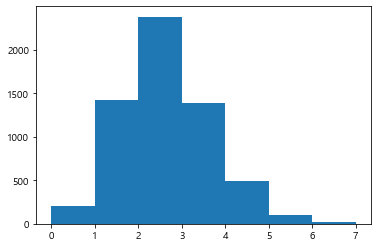

In [9]:
# left join으로 발생된 missing value를 0으로 변경

dfc21['cnt_cat'] = np.where(dfc21['cnt_cat'].isna(), 0, dfc21['cnt_cat'])
display(dfc21.head())

bins = len(dfc21.cnt_cat.unique())-1
plt.hist(dfc21.cnt_cat, bins=bins);

In [10]:
# target variables 와 관계 확인

# 금액과의 상관성이 더 높음

print(np.corrcoef(dfc21.amt_nxtyr, dfc21.cnt_cat)[0,1], 
      np.corrcoef(dfc21.cnt_nxtyr, dfc21.cnt_cat)[0,1])

0.20561477001549075 0.0766150768998433


In [11]:
# 변수간 관계를 활용한 파생변수 생성

# 먼저 상관관계 확인
corrcats = dfc21[featlist].corr()
corrcats 

,amt_nike,amt_hnm,amt_strbk,amt_dgt,amt_book,amt_htl,amt_prmmsneakers
amt_nike,1.000000,-0.001563,0.027709,0.128844,0.148248,-0.009355,0.011902
amt_hnm,-0.001563,1.000000,0.027295,0.026095,0.029349,0.034720,0.013687
amt_strbk,0.027709,0.027295,1.000000,0.228538,0.252120,0.028274,0.014532
amt_dgt,0.128844,0.026095,0.228538,1.000000,0.634559,0.016414,0.005772
amt_book,0.148248,0.029349,0.252120,0.634559,1.000000,0.016626,-0.028192
amt_htl,-0.009355,0.034720,0.028274,0.016414,0.016626,1.000000,0.012983
amt_prmmsneakers,0.011902,0.013687,0.014532,0.005772,-0.028192,0.012983,1.000000


In [12]:
# wide format을 long format으로 변경
corrcats1 = pd.melt(corrcats.reset_index(), id_vars='index', value_vars=featlist)
corrcats1 = corrcats1[(corrcats1.value >0.2) & (corrcats1.value <1)]
corrcats1.sort_values('value', ascending=False)

,index,variable,value
25,amt_book,amt_dgt,0.634559
31,amt_dgt,amt_book,0.634559
18,amt_book,amt_strbk,0.252120
30,amt_strbk,amt_book,0.252120
17,amt_dgt,amt_strbk,0.228538
23,amt_strbk,amt_dgt,0.228538


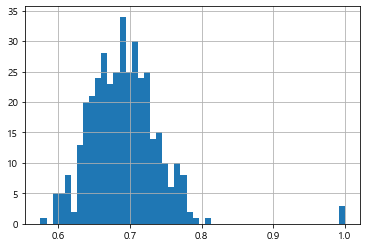

In [13]:
# book과 dgt 간에 높은 상관관계가 존재함은 알았고
# 두 품목 중 더 많은 금액이 어느 쪽인지를 보여주는 파생변수 생성

# 합계중 디지털이 차지하는 비중을 비율화
dfc21['dgt_bk_ratio'] = dfc21.amt_dgt / (dfc21.amt_book + dfc21.amt_dgt +1)

# 둘 다 구매하지 않은 고객은 제외하고 분포 확인
dfc21['dgt_bk_ratio'][dfc21['dgt_bk_ratio']>0].hist(bins=50)

In [14]:
# 금액과의 상관성이 더 높음

print(np.corrcoef(dfc21.amt_nxtyr, dfc21.dgt_bk_ratio)[0,1], 
      np.corrcoef(dfc21.cnt_nxtyr, dfc21.dgt_bk_ratio)[0,1])

0.26016449474030134 0.019056481913686224


In [27]:
# alternatively
dfc21[['amt_nxtyr','cnt_nxtyr', 'dgt_bk_ratio']].corr()

,amt_nxtyr,cnt_nxtyr,dgt_bk_ratio
amt_nxtyr,1.000000,0.099276,0.260164
cnt_nxtyr,0.099276,1.000000,0.019056
dgt_bk_ratio,0.260164,0.019056,1.000000


--> 다양한 파생변수를 생성해서 후보로의 가능성을 확인한 후 유용해 보이는 변수는 생성된 파생 데이터를 데이터셋에 추가

### 결측치 처리 - missing value handling

In [15]:
# 구조 확인 및 결측치 존재 여부 확인

print('shape of dataset ', dfc21.shape)
print('how many missing? ', dfc21.isna().any().sum())

shape of dataset  (6000, 15)
how many missing?  0


In [16]:
tmp_amt_book = dfc21.amt_book[2000] # 복구를 위해 임시로 복사해두고
tmp_amt_book
# tmp_amt_book = 31000
dfc21.amt_book[2000] = np.nan # 강제로 missing value 생성
# dfc21.amt_book[2000] = tmp_amt_book # 복구에 사용

print(dfc21.amt_book[2000])
print('how many missing? ', dfc21.isna().any().sum())

nan
how many missing?  1


In [17]:
# 어느 컬럼에 missing?
print(dfc21.isna().any())

# missing value 처리
# 평균으로 대체 replacement

dfc21['amt_book'] = [dfc21.amt_book.mean() if pd.isna(x) else x for x in dfc21.amt_book]

# 다시 missing 여부 체크
print(dfc21.isna().any().sum(), ' *')
print(dfc21.amt_book[2000], ' ** ', dfc21.amt_book.mean())

custid              False
age                 False
amt_nike            False
amt_hnm             False
amt_strbk           False
amt_dgt             False
amt_book             True
amt_htl             False
amt_prmmsneakers    False
cnt_pstyr           False
cnt_login           False
amt_nxtyr           False
cnt_nxtyr           False
cnt_cat             False
dgt_bk_ratio        False
dtype: bool
0  *
10069.344890815137  **  10069.344890815137


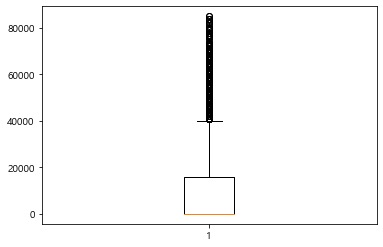

In [18]:
plt.boxplot(dfc21.amt_book);

### 아웃라이어 확인 및 처리 outlier detection and handling

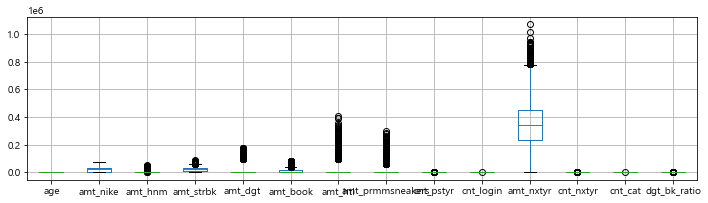

In [19]:
plt.figure(figsize=(12,3))
dfc21[dfc21.columns[1::]].boxplot(); # 2번째 부터 전체 컬럼들 리스트

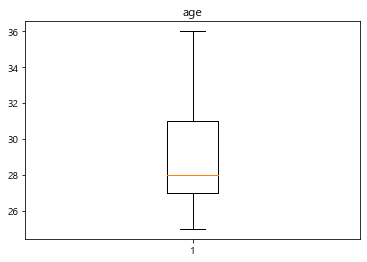

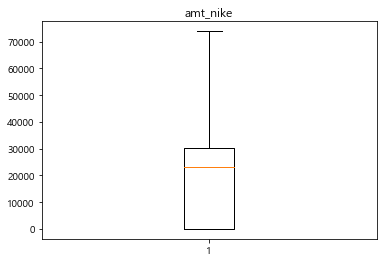

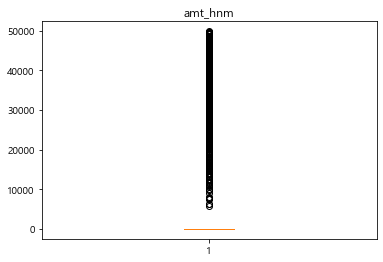

In [20]:
# 연속으로 박스플롯 출력 - 아웃라이어 존재 여부 확인

# for x in dfc21.columns[1::]:
for x in dfc21.columns[1:4]:    
    plt.boxplot(dfc21[x])
    plt.title(x)
    plt.show()    

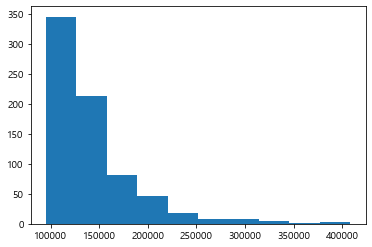

In [21]:
# 호텔 이용금액 분포 확인
plt.hist(dfc21.amt_htl[dfc21.amt_htl>0]);

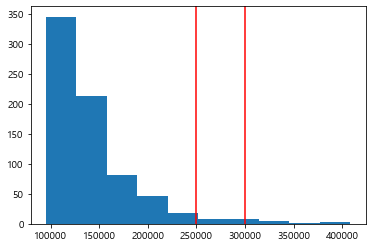

In [22]:
# 아웃라이어 판정 기준점 설정

plt.hist(dfc21.amt_htl[dfc21.amt_htl>0])
plt.axvline(250000, color='red')
plt.axvline(300000, color='red')

In [23]:
# 아웃라이어 값의 대체

# 예: 30만원 이상인 경우는 비정상적인 경우라고 가정하면 30만원으로 대체

# dfc21['amt_htl'] = np.where(dfc21['amt_htl']>300000, 300000, dfc21['amt_htl'])

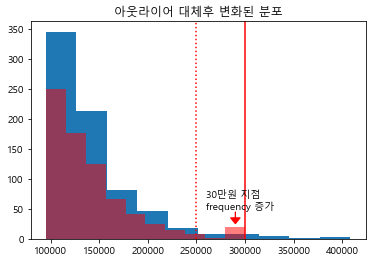

In [24]:
adj_amt_htl = np.where(dfc21['amt_htl']>300000, 300000, dfc21['amt_htl'])

plt.hist(dfc21.amt_htl[dfc21.amt_htl>0])
plt.hist(adj_amt_htl[adj_amt_htl>0], color='red', alpha=0.5)
plt.axvline(250000, color='red', linestyle='dotted')
plt.axvline(300000, color='red')

plt.text(260000, 50, '30만원 지점\nfrequency 증가')
plt.arrow(290000,50-5, 0,-20, length_includes_head=True,
          head_width=10000, head_length=10, 
          color='red')
plt.title('아웃라이어 대체후 변화된 분포')
plt.show()

[연습문제]
- 스타벅스 이용금액에서 아웃라이어를 설정하고 대체한 후 분포를 확인하라
- 기준에 따라 대체된 고객은 몇명인가?

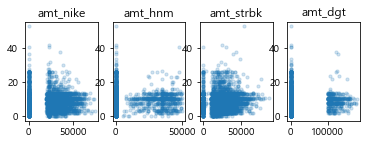

In [25]:
# 한 눈에 여러 챠트를 확인하기 위해 옆으로 출력

plt.figure(1)
for i in range(1,5):
    ax = plt.subplot(240+i)
    plt.scatter(dfc21[dfc21.columns[1::][i]], dfc21.cnt_nxtyr,
               s=10, alpha=0.2)
    plt.title(dfc21.columns[1::][i])
plt.show()